In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Titanic dataset
df = sns.load_dataset("titanic")

In [29]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



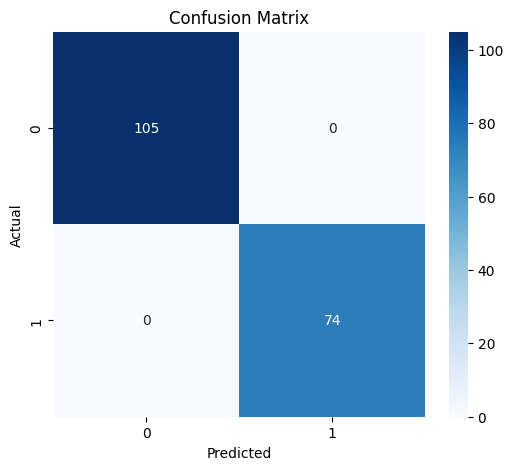

In [33]:


# Features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing with imputation + encoding + scaling
preprocess = ColumnTransformer(
    transformers=[
        ("num", 
         Pipeline([
             ("imputer", SimpleImputer(strategy="median")),
             ("scaler", StandardScaler())
         ]), 
         num_cols),
        
        ("cat", 
         Pipeline([
             ("imputer", SimpleImputer(strategy="most_frequent")),
             ("onehot", OneHotEncoder(handle_unknown="ignore"))
         ]), 
         cat_cols)
    ]
)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit + transform data
X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_processed, y_train)

# Prediction
y_pred = model.predict(X_test_processed)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



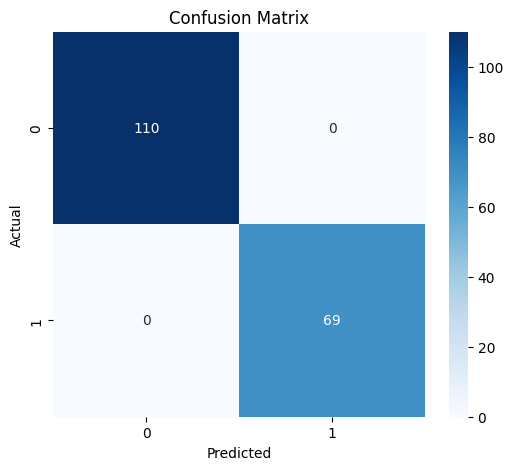

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline   # important

# ================================
# 1. Load Titanic dataset
# ================================
df = sns.load_dataset("titanic")

# Features & target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# ================================
# 2. Preprocessing: Impute + Encode + Scale
# ================================
preprocess = ColumnTransformer(
    transformers=[
        ("num",
         Pipeline([
             ("imputer", SimpleImputer(strategy="median")),
             ("scaler", StandardScaler())
         ]),
         num_cols),

        ("cat",
         Pipeline([
             ("imputer", SimpleImputer(strategy="most_frequent")),
             ("onehot", OneHotEncoder(handle_unknown="ignore"))
         ]),
         cat_cols)
    ]
)

# ================================
# 3. Full Pipeline with SMOTE
# ================================
model = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE()),                     # handle imbalanced target
    ("clf", LogisticRegression(max_iter=2000))
])

# ================================
# 4. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 5. Fit the Model
# ================================
model.fit(X_train, y_train)

# ================================
# 6. Predictions
# ================================
y_pred = model.predict(X_test)

# ================================
# 7. Evaluation
# ================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


K-Fold Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


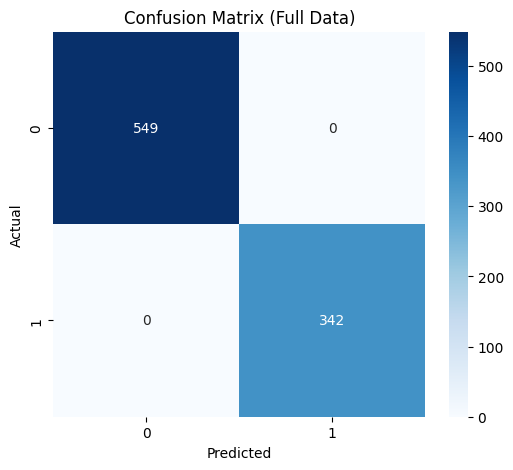


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# ================================
# 1. Load Titanic dataset
# ================================
df = sns.load_dataset("titanic")

X = df.drop("survived", axis=1)
y = df["survived"]

# Identify categorical & numeric columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns


# ================================
# 2. Preprocessing (Impute + Encode + Scale)
# ================================
preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])


# ================================
# 3. Full Pipeline with SMOTE + Logistic Regression
# ================================
model = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE()),
    ("clf", LogisticRegression(max_iter=2000))
])


# ================================
# 4. Stratified K-Fold Cross Validation
# ================================
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")

print("K-Fold Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


# ================================
# 5. Final Fit & Confusion Matrix
# ================================
model.fit(X, y)          # fit on full data

y_pred = model.predict(X)

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Full Data)")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



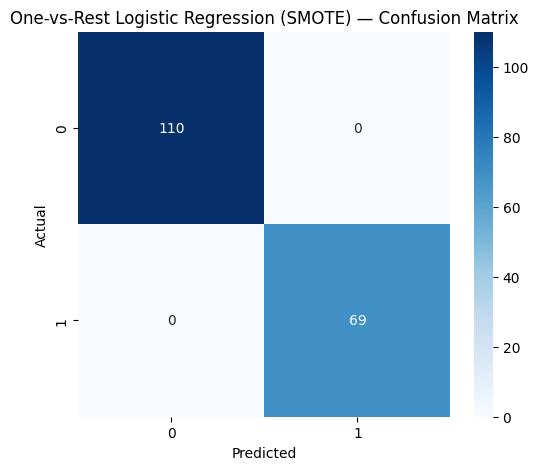

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# ================================
# 1. Load Titanic dataset
# ================================
df = sns.load_dataset("titanic")

# Features & target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify column types
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns


# ================================
# 2. Preprocessing
# ================================
preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])


# ================================
# 3. One-vs-Rest Logistic Regression + SMOTE
# ================================
ovr_model = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE()),
    ("clf", OneVsRestClassifier(LogisticRegression(max_iter=2000)))
])


# ================================
# 4. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ================================
# 5. Fit Model
# ================================
ovr_model.fit(X_train, y_train)


# ================================
# 6. Predictions
# ================================
y_pred = ovr_model.predict(X_test)


# ================================
# 7. Evaluation
# ================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


# ================================
# 8. Confusion Matrix
# ================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("One-vs-Rest Logistic Regression (SMOTE) — Confusion Matrix")
plt.show()


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



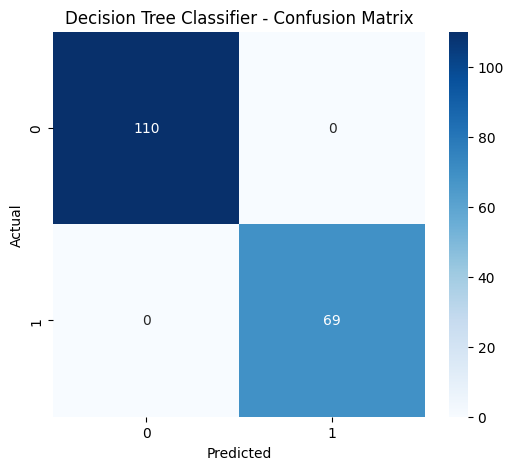

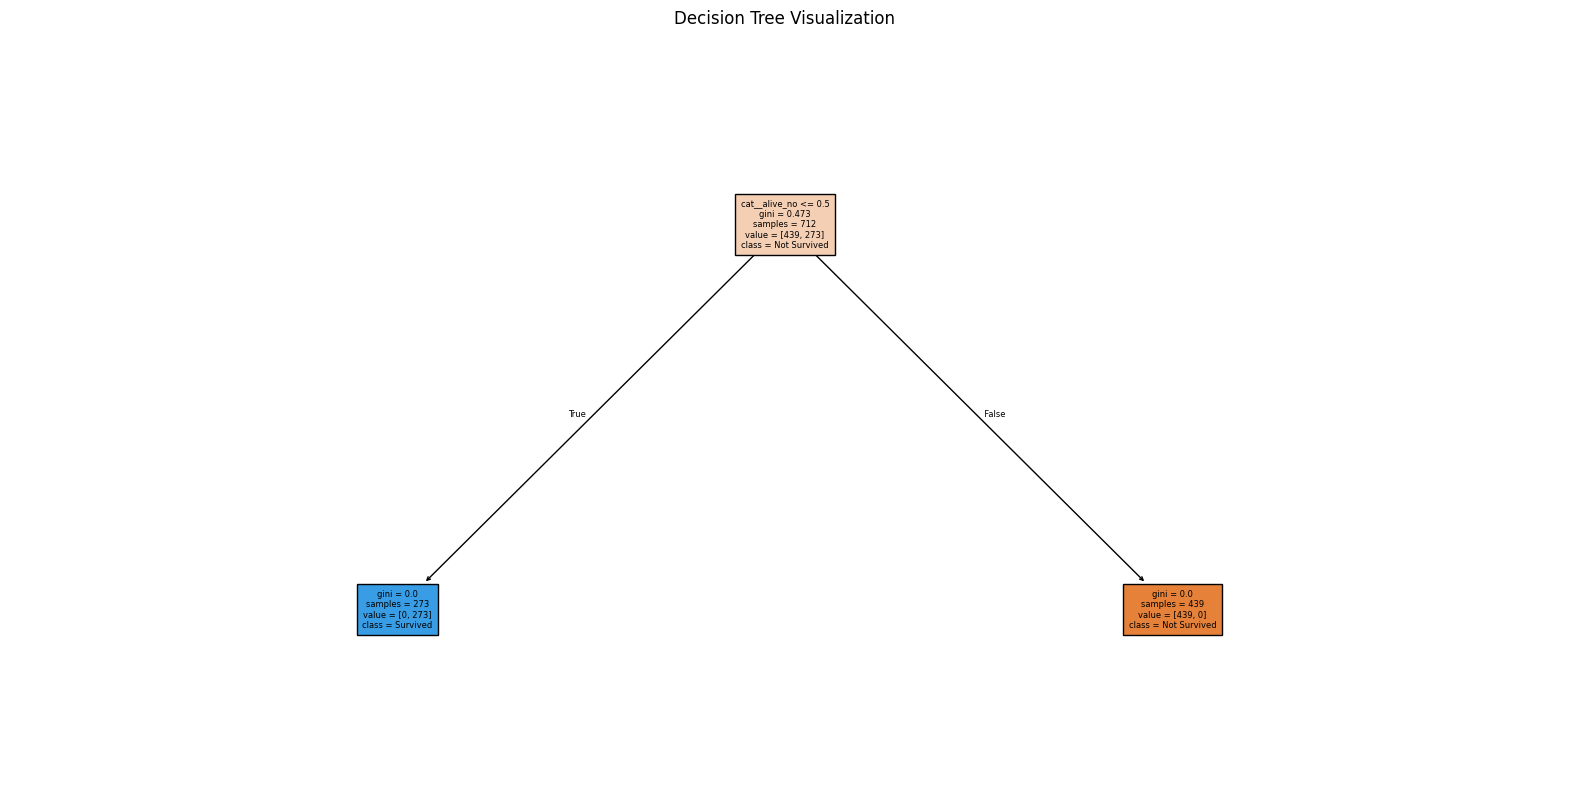

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ================================
# Load Dataset
# ================================
df = sns.load_dataset("titanic")

# Features & Target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify column types
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# ================================
# Preprocessing
# ================================
preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# ================================
# Decision Tree Model
# ================================
model = Pipeline([
    ("preprocess", preprocess),
    ("clf", DecisionTreeClassifier(
        criterion="gini",      # you can change to "entropy"
        max_depth=None,         # you can limit depth
        random_state=42
    ))
])

# ================================
# Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# Fit the Model
# ================================
model.fit(X_train, y_train)

# ================================
# Prediction
# ================================
y_pred = model.predict(X_test)

# ================================
# Evaluation
# ================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ================================
# Confusion Matrix
# ================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Classifier - Confusion Matrix")
plt.show()

# ================================
# Plot Decision Tree (Optional)
# ================================
plt.figure(figsize=(20,10))
tree_model = model.named_steps['clf']
feature_names = model.named_steps['preprocess'].get_feature_names_out()
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=["Not Survived", "Survived"],
    filled=True,
    fontsize=6
)
plt.title("Decision Tree Visualization")
plt.show()


Accuracy: 0.7482517482517482

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        80
           1       0.72      0.70      0.71        63

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



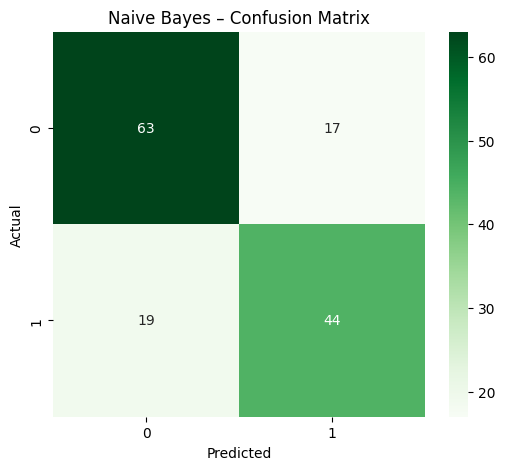

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Drop completely useless columns
df = df.drop(["adult_male", "alive", "class", "who", "embarked", "deck"], axis=1)

# Handle missing values
df = df.dropna()

# Encode categorical columns
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object" or df[col].dtype == "category":
        df[col] = label.fit_transform(df[col])

# Feature & target
X = df.drop("survived", axis=1)
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes – Confusion Matrix")
plt.show()


KNN Accuracy for K = 1 to 30:

K = 1 --> Accuracy = 0.7483
K = 2 --> Accuracy = 0.7273
K = 3 --> Accuracy = 0.7902
K = 4 --> Accuracy = 0.7902
K = 5 --> Accuracy = 0.7972
K = 6 --> Accuracy = 0.8042
K = 7 --> Accuracy = 0.8042
K = 8 --> Accuracy = 0.8112
K = 9 --> Accuracy = 0.8042
K = 10 --> Accuracy = 0.8112
K = 11 --> Accuracy = 0.8042
K = 12 --> Accuracy = 0.7972
K = 13 --> Accuracy = 0.7972
K = 14 --> Accuracy = 0.8182
K = 15 --> Accuracy = 0.7972
K = 16 --> Accuracy = 0.7972
K = 17 --> Accuracy = 0.8042
K = 18 --> Accuracy = 0.7972
K = 19 --> Accuracy = 0.8042
K = 20 --> Accuracy = 0.7832
K = 21 --> Accuracy = 0.7972
K = 22 --> Accuracy = 0.8042
K = 23 --> Accuracy = 0.8042
K = 24 --> Accuracy = 0.7972
K = 25 --> Accuracy = 0.7902
K = 26 --> Accuracy = 0.7902
K = 27 --> Accuracy = 0.7762
K = 28 --> Accuracy = 0.7902
K = 29 --> Accuracy = 0.7832
K = 30 --> Accuracy = 0.7972

 Best K = 14 with accuracy = 0.8182



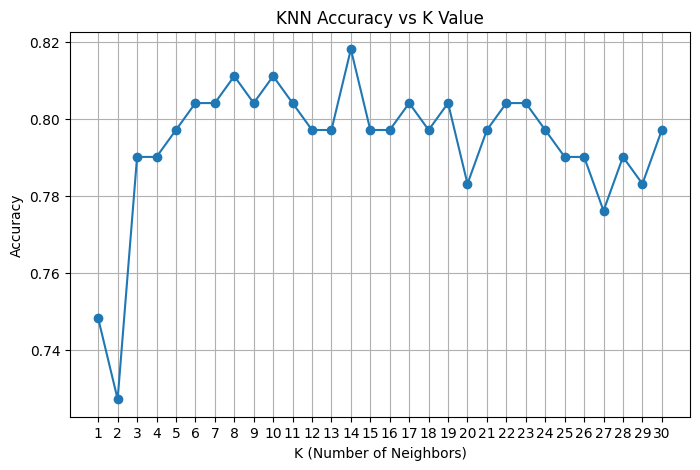

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Drop columns with too many missing values
df = df.drop(["deck","embarked","class","who","alive","adult_male"], axis=1)

# Remove rows with missing values
df = df.dropna()

# Encode categorical variables
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object" or df[col].dtype == "category":
        df[col] = label.fit_transform(df[col])

# Split data
X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test accuracy for K values
accuracy_list = []
k_values = range(1, 31)

print("KNN Accuracy for K = 1 to 30:\n")

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

    print(f"K = {k} --> Accuracy = {acc:.4f}")

# Find best K
best_k = k_values[np.argmax(accuracy_list)]
best_acc = max(accuracy_list)

print("\n==============================")
print(f" Best K = {best_k} with accuracy = {best_acc:.4f}")
print("==============================\n")

# Plot K vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_list, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

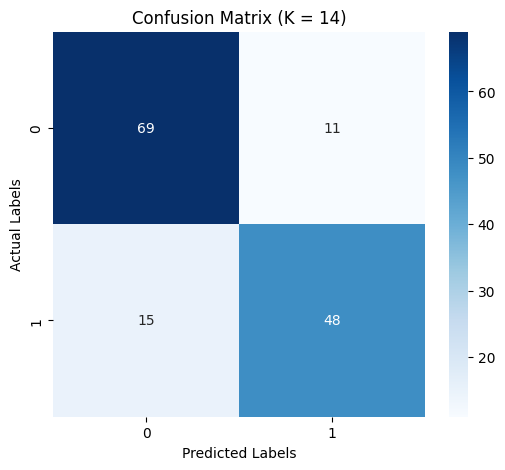

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model with K = 14
model_k14 = KNeighborsClassifier(n_neighbors=14)
model_k14.fit(X_train_scaled, y_train)

# Predict
y_pred_k14 = model_k14.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_k14)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (K = 14)")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



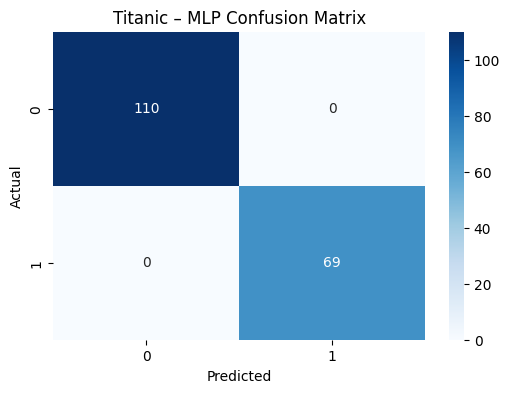

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load Titanic dataset
df = sns.load_dataset("titanic")

# Features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# MLP Classifier (ReLU – Recommended)
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

# Full pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", mlp)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Titanic – MLP Confusion Matrix")
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7381 - loss: 0.5827 - val_accuracy: 0.7622 - val_loss: 0.5341
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8155 - loss: 0.4856 - val_accuracy: 0.7902 - val_loss: 0.4454
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8682 - loss: 0.4007 - val_accuracy: 0.8671 - val_loss: 0.3679
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9104 - loss: 0.3229 - val_accuracy: 0.9091 - val_loss: 0.2969
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9244 - loss: 0.2527 - val_accuracy: 0.9441 - val_loss: 0.2392
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9438 - loss: 0.1932 - val_accuracy: 0.9441 - val_loss: 0.1887
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9578 - loss: 0.1453 - val_accuracy: 0.9580 - val_loss: 0.1404
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9789 - loss: 0.1054 - val_accuracy: 0.9930 - v

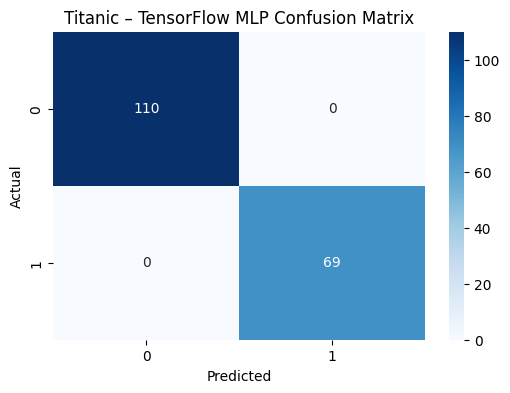

In [4]:
# =========================
# Imports
# =========================
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# =========================
# Load Dataset
# =========================
df = sns.load_dataset("titanic")

X = df.drop("survived", axis=1)
y = df["survived"]

# =========================
# Feature Identification
# =========================
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# =========================
# Preprocessing Pipelines
# =========================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# =========================
# Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# =========================
# Apply Preprocessing
# =========================
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

input_dim = X_train.shape[1]

# =========================
# TensorFlow MLP Model
# =========================
model = Sequential([
    Dense(32, activation="relu", input_shape=(input_dim,)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# =========================
# Train Model
# =========================
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# =========================
# Predictions
# =========================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# =========================
# Evaluation
# =========================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =========================
# Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Titanic – TensorFlow MLP Confusion Matrix")
plt.show()